<a href="https://colab.research.google.com/github/Rama-Lekshmi/rnn-stock-price-prediction/blob/main/DL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [9]:
training_set_scaled.shape

(1259, 1)

In [10]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))


In [11]:
X_train.shape


(1199, 60)

In [12]:
length = 60
n_features = 1


In [13]:
model = models.Sequential()
model.add(layers.SimpleRNN(10,input_shape=(length,n_features)))
model.add(layers.Dense(1))

In [14]:

model.compile(optimizer='adam', loss='mse')

In [36]:
print("NAME: RAMA E.K. LEKSHMI   \nREGISTER NUMBER: 212222240082 \n        ")

model.summary()

NAME: RAMA E.K. LEKSHMI   
REGISTER NUMBER: 212222240082 
        
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train1,y_train,epochs=80, batch_size=32)

Epoch 1/80
38/38 [==============================] - 2s 11ms/step - loss: 0.1421
Epoch 2/80
38/38 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 3/80
38/38 [==============================] - 0s 11ms/step - loss: 7.1225e-04
Epoch 4/80
38/38 [==============================] - 0s 13ms/step - loss: 5.6138e-04
Epoch 5/80
38/38 [==============================] - 1s 18ms/step - loss: 5.0965e-04
Epoch 6/80
38/38 [==============================] - 1s 18ms/step - loss: 4.6658e-04
Epoch 7/80
38/38 [==============================] - 1s 17ms/step - loss: 4.3849e-04
Epoch 8/80
38/38 [==============================] - 1s 19ms/step - loss: 4.1556e-04
Epoch 9/80
38/38 [==============================] - 1s 15ms/step - loss: 3.9072e-04
Epoch 10/80
38/38 [==============================] - 0s 10ms/step - loss: 3.7813e-04
Epoch 11/80
38/38 [==============================] - 0s 11ms/step - loss: 3.6358e-04
Epoch 12/80
38/38 [==============================] - 0s 10ms/step - loss: 3.5044e-

In [17]:
dataset_test = pd.read_csv('testset.csv')

In [18]:
test_set = dataset_test.iloc[:,1:2].values

In [19]:
test_set.shape

(125, 1)

In [20]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [26]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [27]:
X_test.shape

(1324, 60, 1)

In [28]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 4ms/step


NAME: RAMA E.K. LEKSHMI 
REGISTER NUMBER: 212222240082
 


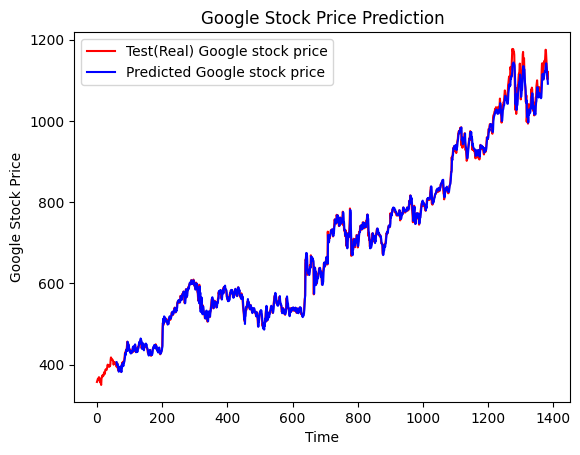

In [38]:
print("NAME: RAMA E.K. LEKSHMI \nREGISTER NUMBER: 212222240082\n ")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
